In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore")
import numpy as np

In [95]:
data1=pd.read_csv("50_Startups.csv")

In [96]:
data1.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [97]:
data1.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


# EDA & Visualisation

In [98]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


# Rename Columns

In [99]:
Stard=data1.rename({"R&D Spend":"Rdm", "Administration":"Adm", "Marketing Spend":"Mks"}, axis=1)

In [100]:
Stard.head()

,Rdm,Adm,Mks,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [101]:
Stard.isnull().sum()

Rdm       0
Adm       0
Mks       0
State     0
Profit    0
dtype: int64

In [102]:
Stard[Stard.duplicated()]

,Rdm,Adm,Mks,State,Profit


# Visualisations

In [41]:
Stard.corr()

,Rdm,Adm,Mks,Profit
Rdm,1.000000,0.241955,0.724248,0.972900
Adm,0.241955,1.000000,-0.032154,0.200717
Mks,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


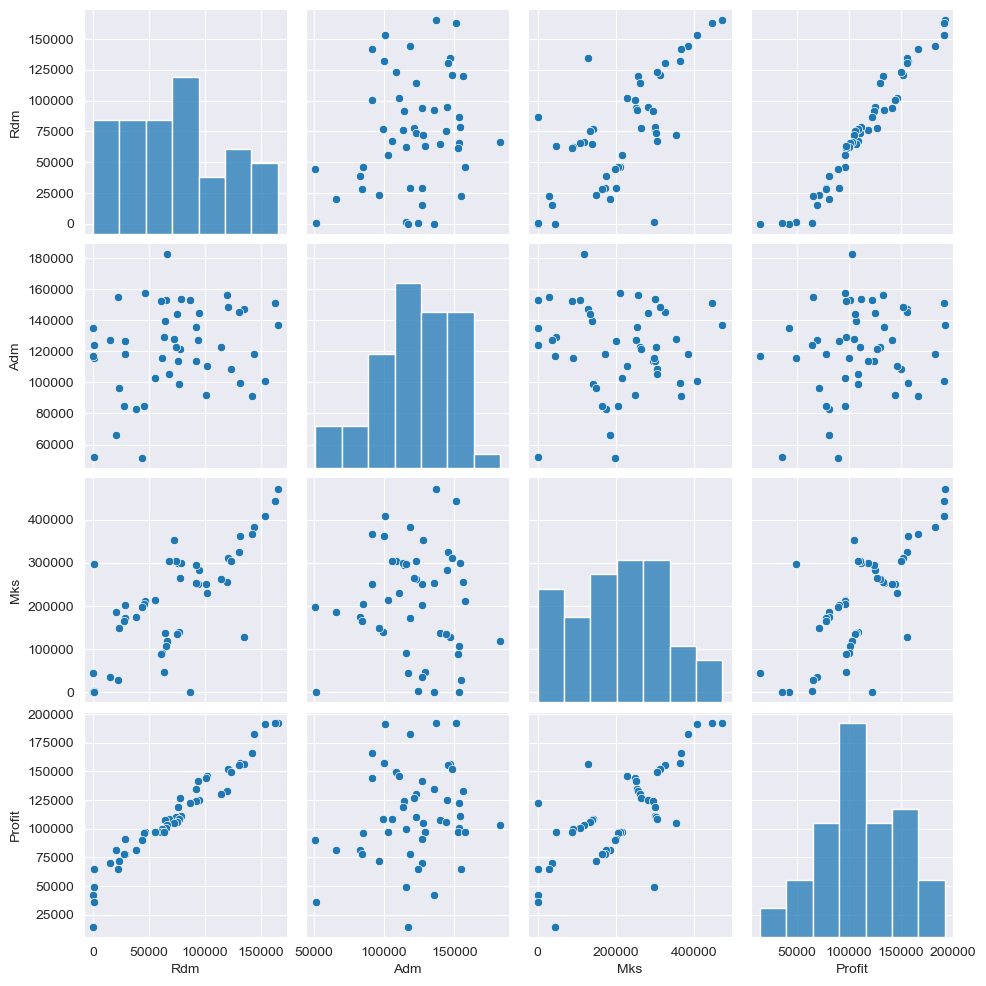

In [42]:
sns.set_style(style='darkgrid')
sns.pairplot(Stard)

# Create a model

In [44]:
model=smf.ols("Profit~Rdm+Adm+Mks",data =Stard).fit()

# Test the model

In [45]:
model

In [46]:
model.params

Intercept    50122.192990
Rdm              0.805715
Adm             -0.026816
Mks              0.027228
dtype: float64

In [47]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Thu, 16 Feb 2023   Prob (F-statistic):           4.53e-30
Time:                        14:07:28   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
Rdm            0.8057      0.045     17.846      0.000       0.715       0.897
Adm           -0.0268      0.051     -0.526      0.602      -0.130       0.076
Mks            0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
print(model.pvalues, '\n' ,model.tvalues)

Intercept    1.057379e-09
Rdm          2.634968e-22
Adm          6.017551e-01
Mks          1.047168e-01
dtype: float64 
 Intercept     7.626218
Rdm          17.846374
Adm          -0.525507
Mks           1.655077
dtype: float64


# Simple Linear Regression Models

In [49]:
#1.The SLR algorithm applys on Insignificant Variables
Slr_Adm = smf.ols("Profit~Adm", data=Stard).fit()

In [50]:
print(Slr_Adm.tvalues, '\n', Slr_Adm.pvalues)

Intercept    3.040044
Adm          1.419493
dtype: float64 
 Intercept    0.003824
Adm          0.162217
dtype: float64


In [51]:
#2.Mks
Slr_Mks = smf.ols("Profit~Mks", data=Stard).fit()

In [52]:
Slr_Mks.tvalues,  Slr_Mks.pvalues

(Intercept    7.808356
 Mks          7.802657
 dtype: float64,
 Intercept    4.294735e-10
 Mks          4.381073e-10
 dtype: float64)

In [53]:
#3.Adm&Mks
Slr_AM =smf.ols("Profit~Adm+Mks", data=Stard).fit()

In [54]:
Slr_AM.tvalues, Slr_AM.pvalues 

(Intercept    1.142741
 Adm          2.467779
 Mks          8.281039
 dtype: float64,
 Intercept    2.589341e-01
 Adm          1.729198e-02
 Mks          9.727245e-11
 dtype: float64)

# Model Validation Techniques

# 1.Collinearity Checking 

In [55]:
#caluclate VIF=1/(1-Rsquared) for all individual variables
clr_r = smf.ols("Rdm~Adm+Mks", data=Stard).fit().rsquared
Vif_r = 1/(1-clr_r)

In [56]:
Vif_r

2.4689030699947017

In [57]:
clr_a = smf.ols("Adm~Rdm+Mks", data=Stard).fit().rsquared
Vif_a = 1/(1-clr_a)

In [58]:
Vif_a

1.1750910070550453

In [59]:
clr_m = smf.ols("Mks~Rdm+Adm", data=Stard).fit().rsquared
Vif_m = 1/(1-clr_m)

In [60]:
Vif_m

2.3267732905308773

In [61]:
df={"Variable":["Rdm", "Adm", "Mks"], "VIF":[Vif_r,Vif_a,Vif_m]}

In [62]:
ndf = pd.DataFrame(df)

In [63]:
ndf

,Variable,VIF
0,Rdm,2.468903
1,Adm,1.175091
2,Mks,2.326773


# 2.Residual analysis 

# 1. Test normality of residuals (Q_Q plot)

In [64]:
#1.Normality of Resudals(Q-Q plot)
import statsmodels.api as sm

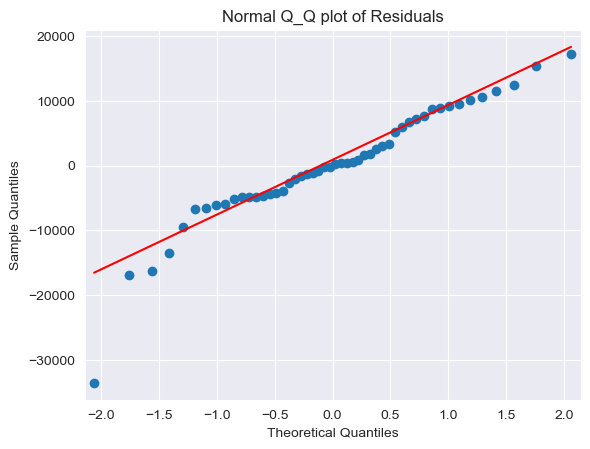

In [65]:
q_qplot=sm.qqplot(model.resid, line='q')
plt.title("Normal Q_Q plot of Residuals")
plt.show()

In [70]:
list(np.where(model.resid>20))

[array([ 1,  2,  3,  8, 10, 11, 12, 13, 16, 19, 20, 25, 28, 30, 34, 35, 36,
        37, 38, 40, 41, 42, 43, 44, 45])]

# 2.Residual plot for Homoscedasticity

In [72]:
def get_standerdized_values(values):
    return(values-values.mean())/values.std()

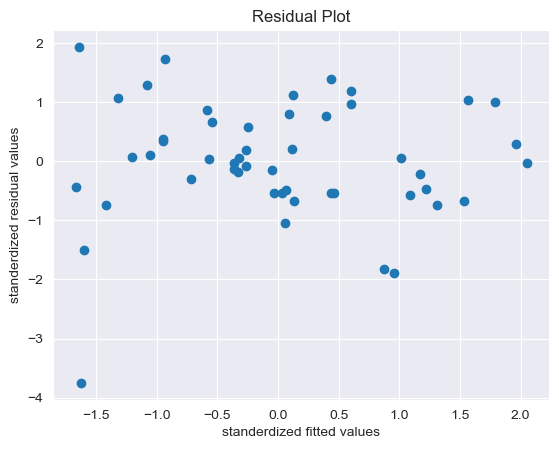

In [73]:
plt.scatter(get_standerdized_values(model.fittedvalues),get_standerdized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel("standerdized fitted values")
plt.ylabel("standerdized residual values")
plt.show()

# 3.Residual vs Regressors

eval_env: 1


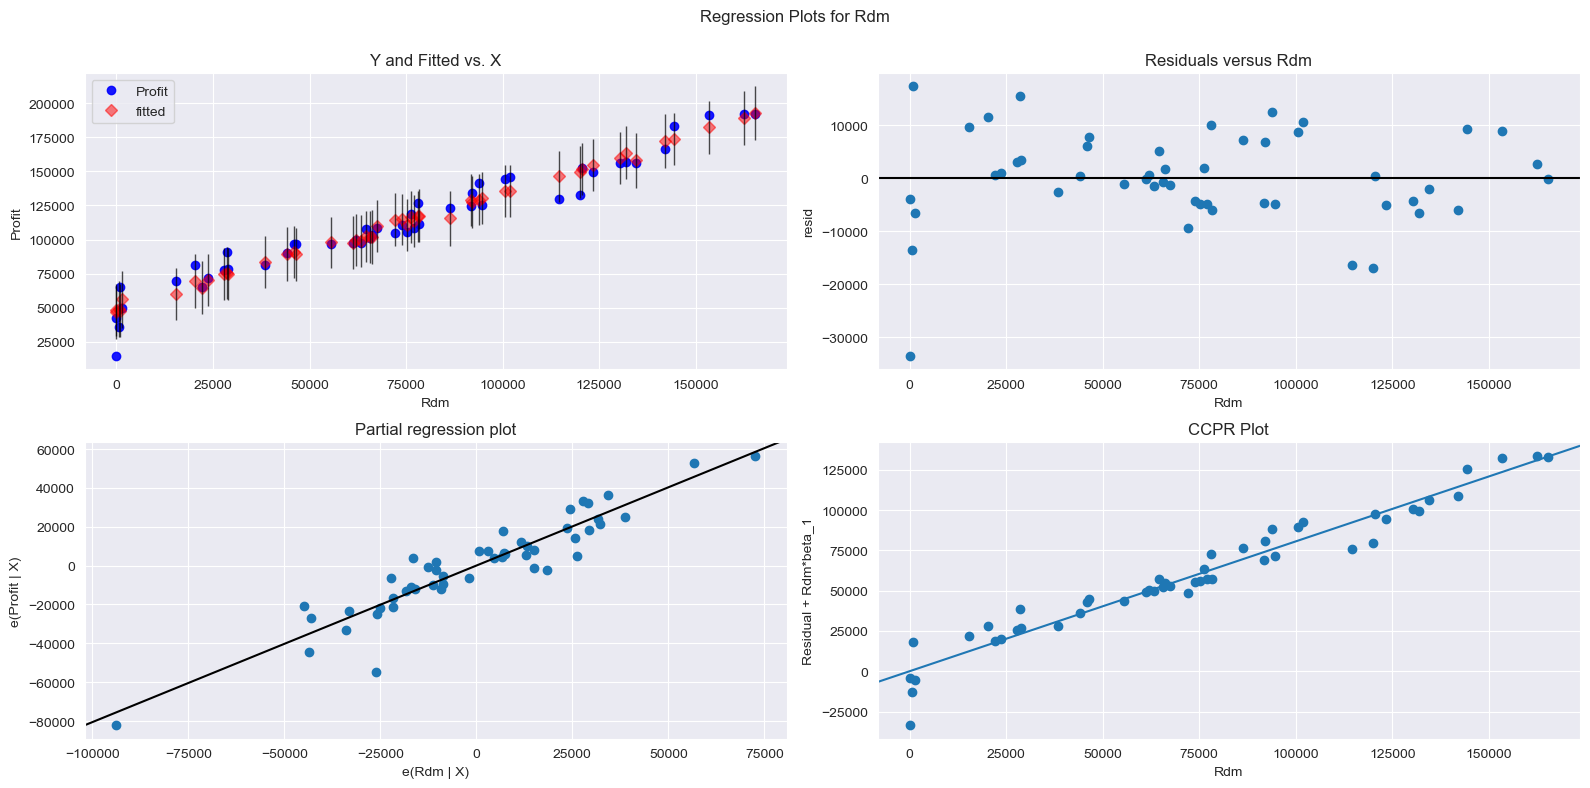

In [79]:
fig = plt.figure(figsize=(16,8))
fig = sm.graphics.plot_regress_exog(model, 'Rdm', fig=fig)
plt.show()

eval_env: 1


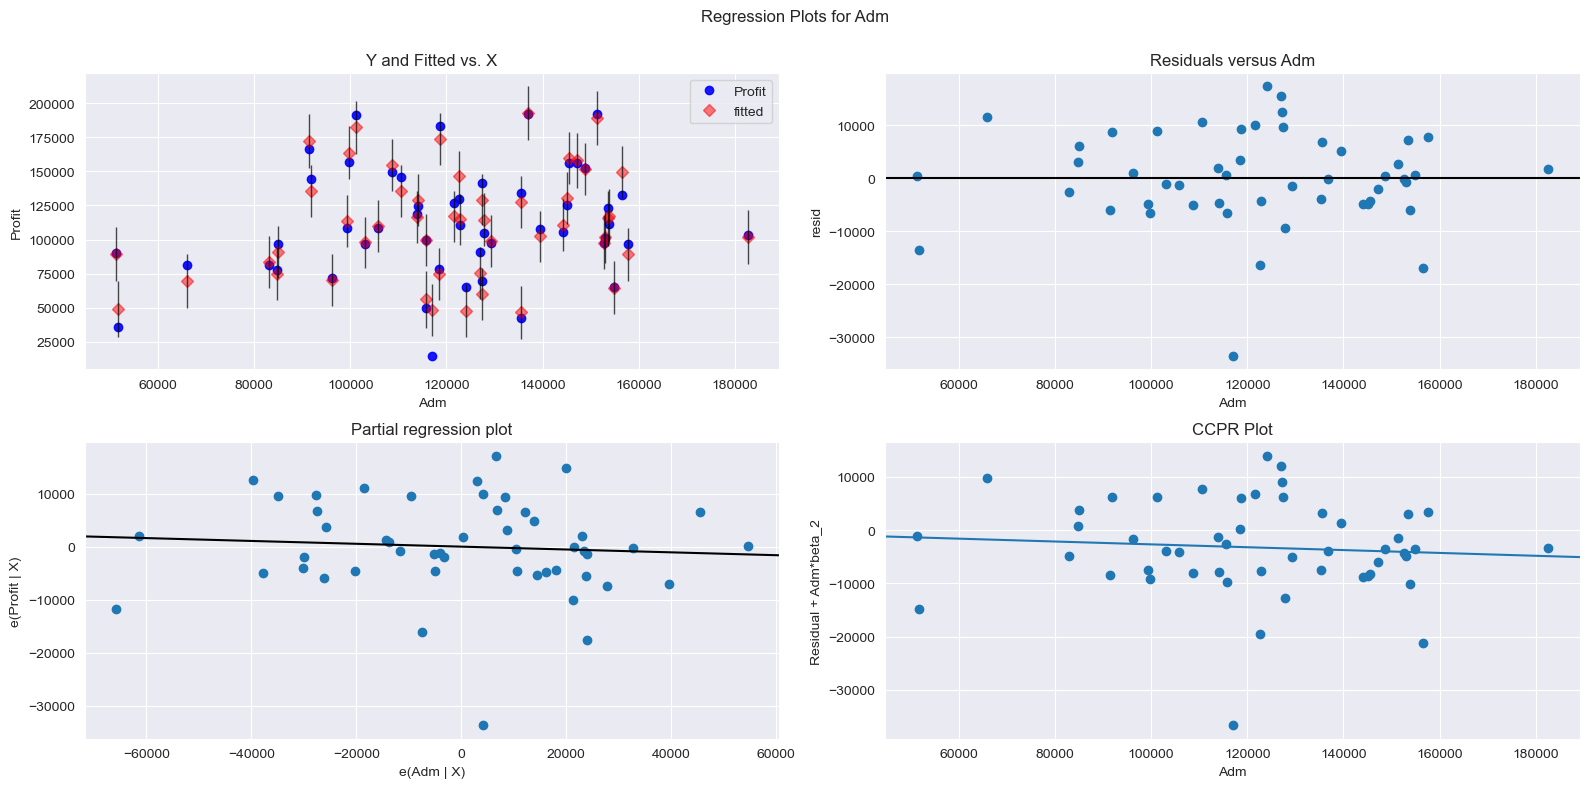

In [80]:
fig = plt.figure(figsize=(16,8))
fig = sm.graphics.plot_regress_exog(model, 'Adm', fig=fig)
plt.show()

eval_env: 1


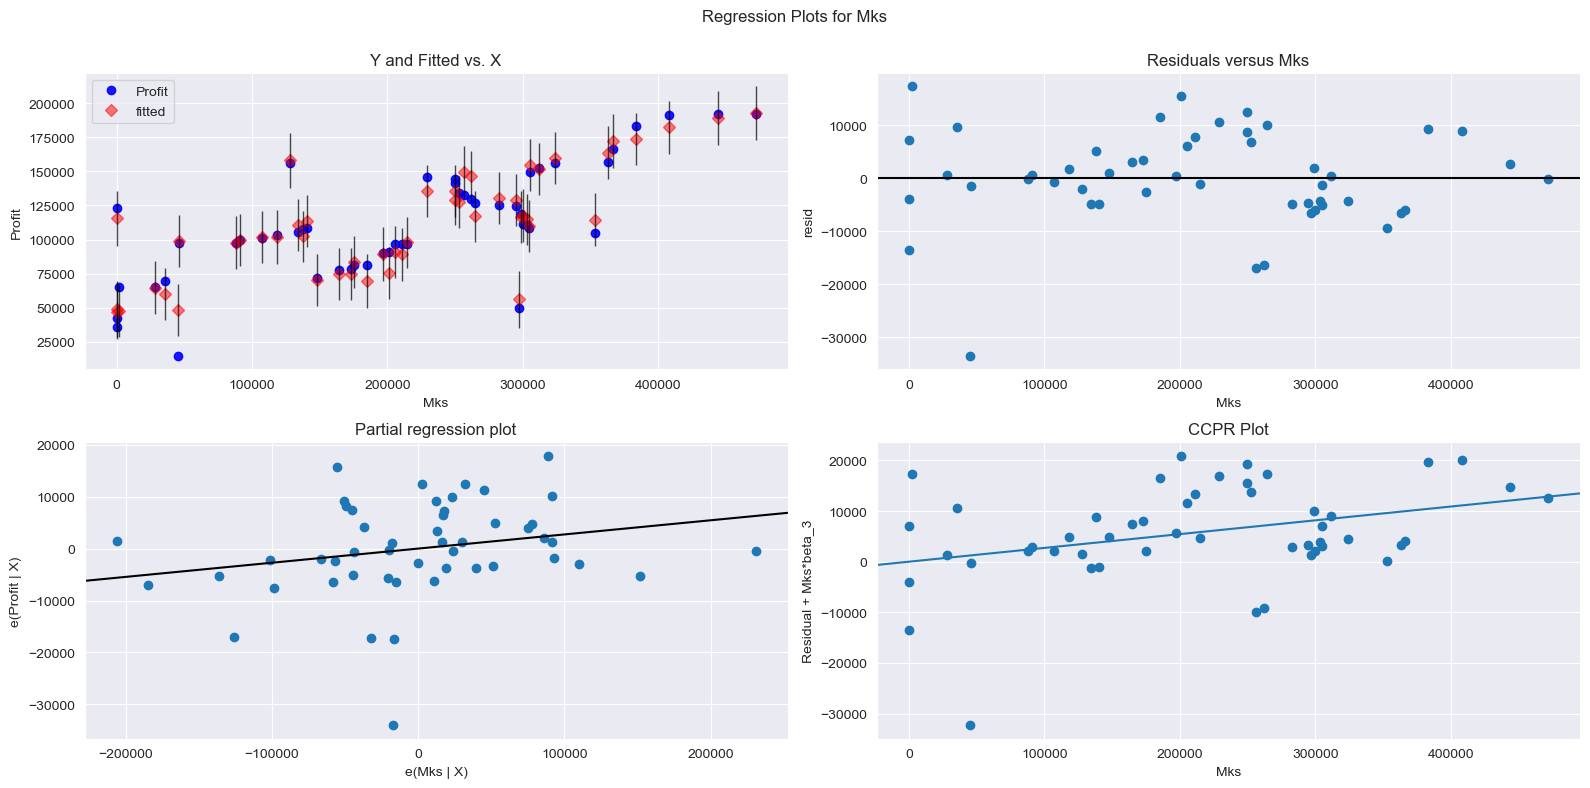

In [81]:
fig = plt.figure(figsize=(16,8))
fig = sm.graphics.plot_regress_exog(model, 'Mks', fig=fig)
plt.show()

# Model Detection Diagnostics

# Detecting Influencers / Outliers

# 1.Cook's distance

In [83]:
model_influence =model.get_influence()
(c, _) = model_influence.cooks_distance

In [84]:
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

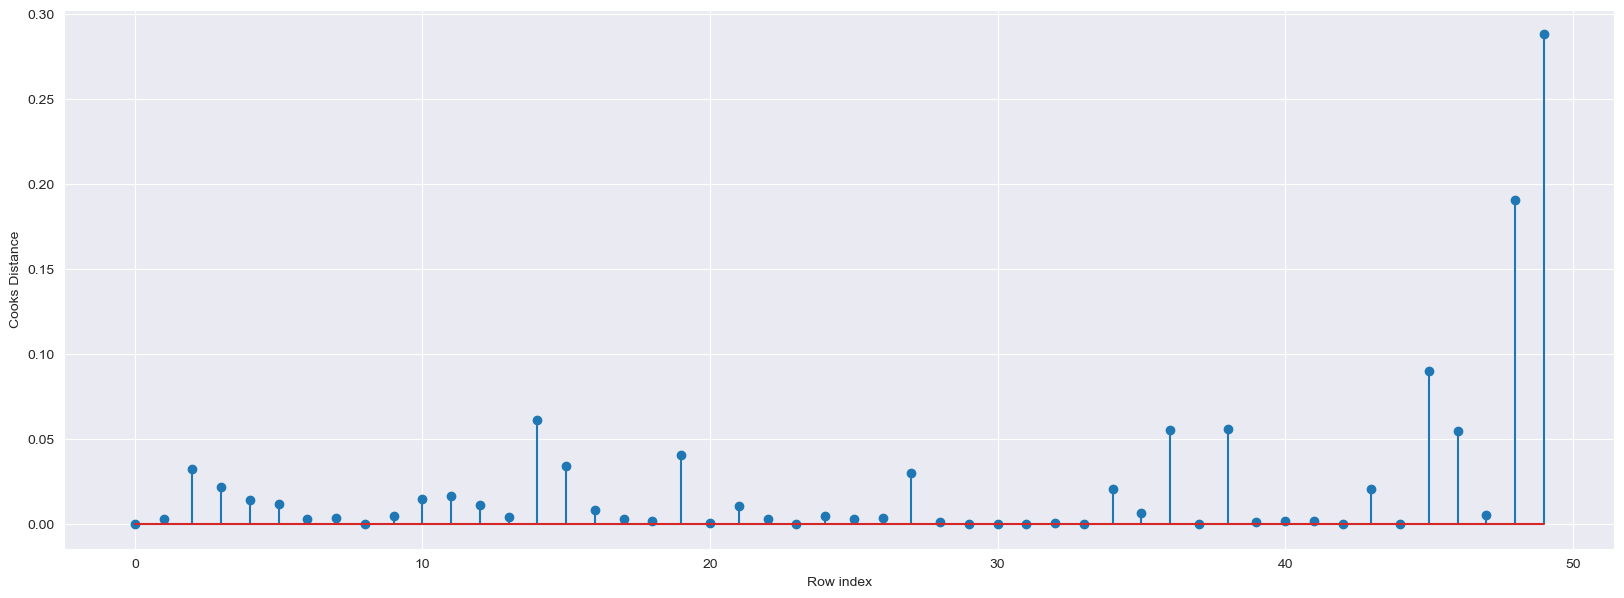

In [85]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(Stard)), np.round(c, 5))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [86]:
np.argmax(c), np.max(c)

(49, 0.28808229275432584)

# 2.Leavarage Value

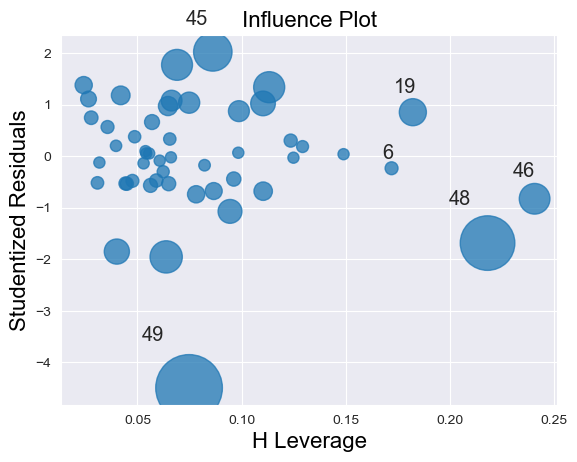

In [88]:
#levarage value using high influence points
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [89]:
k = Stard.shape[1]
n = Stard.shape[0]

leverage_cuttoff = (3*(k+1))/n
leverage_cuttoff

0.3

In [91]:
Stard[Stard.index.isin([49])]

,Rdm,Adm,Mks,Profit
49,0.0,116983.8,45173.06,14681.4


# Improving the Model

In [103]:
Nstard = Stard.drop(Stard.index[[49]], axis=0).reset_index(drop=True)
Nstard

,Rdm,Adm,Mks,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [105]:
while np.max(c)>0.5 :
    model=smf.ols("Profit~Rdm+Adm+Mks",data=dataNstard).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    Nstard=Nstard.drop(dataNstard.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    Nstard
else:
    final_model=smf.ols("Profit~Rdm+Adm+Mks",data=Nstard).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.9613162435129847


In [106]:
final_model.rsquared

0.9613162435129847

In [107]:
Nstard

,Rdm,Adm,Mks,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# Table containing for each prepared model

In [110]:
DStard = {"prepared_models":["model", "final_model"],"Rsquared":[model.rsquared, final_model.rsquared]}
Pre_Table = pd.DataFrame(DStard)
Pre_Table

,prepared_models,Rsquared
0,model,0.950746
1,final_model,0.961316
